# EE915: Week-3 - Project-3 - Logistic Regression - Purchase Dataset
**Name**: Venkateswar Reddy Melachervu </br>
**Roll No.**: 23156022 </br>
**Email**: vmela23@iitk.ac.in </br>
**Dataset**: Pandas Purchase Data Set </br>
**Professor**: Prof. Aditya K. Jagganatham </br>
**TAs**: Meesam and Priyanka </br>

In [1]:
# Importing necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from collections import Counter
from sklearn.metrics import roc_curve, precision_recall_curve, auc

In [2]:
# sigmoid function to map values between 0 and 1
def sigmoid(x):
  return 1/(1 + np.exp(-x))

In [5]:
# function to display confusion matrix plot without watermark - wama
def print_confusion_matrix_nowama(cm, labels, plot_name, Y_test):
    # Calculate counts for each class in the test set
    class_counts = Counter(Y_test)

    # Print the counts
    print("Data Count in Test Set:")
    for class_label, count in class_counts.items():
        if class_label == 0:
            print(f"\tNot Purchased: {count}")
        elif class_label == 1:
            print(f"\tPurchased: {count}")
        else:
            pass
    # Plot the confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)

    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title(plot_name)
    plt.show()

In [6]:
# function to display confusion matrix plot with watermark - wama
def print_confusion_matrix_wama(cm, labels, plot_name, Y_test, wama='23156022'):
    # Calculate counts for each class in the test set
    class_counts = Counter(Y_test)

    # Print the counts
    print("Data Count in Test Set:")
    for class_label, count in class_counts.items():
        if class_label == 0:
            print(f"\tNot Purchased: {count}")
        elif class_label == 1:
            print(f"\tPurchased: {count}")
        else:
            pass

    # Plot the confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)

    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title(plot_name)

    # Add centered diagonal watermark
    plt.text(0.5, 0.5, wama, fontsize=50, color='gray', alpha=0.2,
             rotation=45, ha='center', va='center', transform=plt.gca().transAxes)

    plt.show()

In [7]:
purchaseData = pd.read_csv('Purchase_Logistic.csv')

# Set display options to show all columns
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

# Print the first 5 rows of data
print('First five rows of Purchase Data...')
print(purchaseData.head(), "\n")
print("Total number of rows in Purchase Data Set:", len(purchaseData),"\n")

First five rows of Purchase Data...
    User ID  Gender  Age  EstimatedSalary  Purchased
0  15624510    Male   19            19000          0
1  15810944    Male   35            20000          0
2  15668575  Female   26            43000          0
3  15603246  Female   27            57000          0
4  15804002    Male   19            76000          0 

Total number of rows in Purchase Data Set: 400 



Printing Confusion Matrix...
Data Count in Test Set:
	Not Purchased: 68
	Purchased: 32


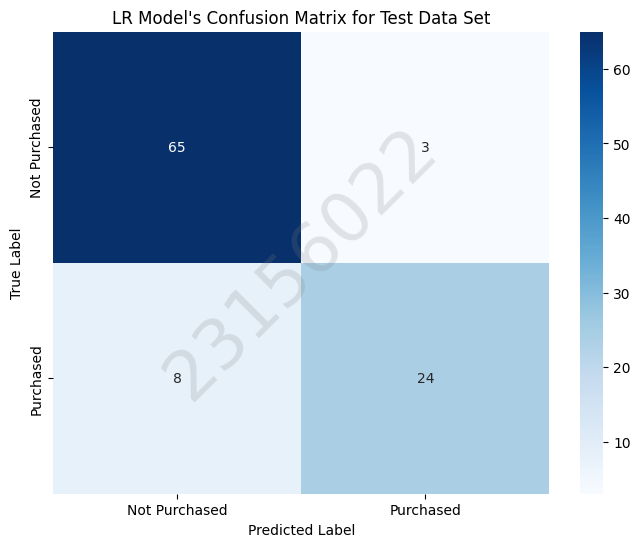

In [8]:
# Define the dependent and independent variables
X = purchaseData.iloc[:, [2, 3]].values
Y = purchaseData.iloc[:, 4].values

# Scale the data   
scaler = StandardScaler() 
X = scaler.fit_transform(X)
# Split the data across train and test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 0)   

# Fit Logistic Regression to the Training set 
logiReg = LogisticRegression(random_state = 0) 
logiReg.fit(X_train, Y_train)    
# Predict the Test set results 
Y_pred = logiReg.predict(X_test)    

# Create the Confusion Matrix and plot it with watermark
labels = ['Not Purchased', 'Purchased']  # replace with your actual class labels if different
plot_name = 'LR Model\'s Confusion Matrix for Test Data Set'
print('Printing Confusion Matrix...')
cmat = confusion_matrix(Y_test, Y_pred)
print_confusion_matrix_wama(cmat, labels, plot_name, Y_test)

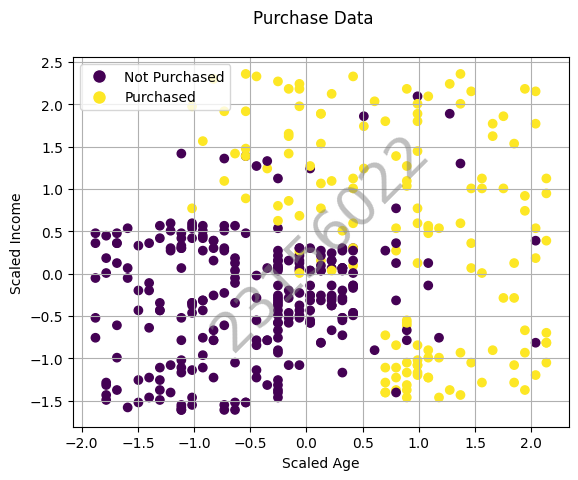

In [7]:
# Plot the scatter plot
plt.figure(1)
cmap = plt.get_cmap('viridis')
scatter = plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=cmap)

# Define colors used for the labels
colors = [cmap(0.0), cmap(1.0)]  # Ensure these match the colormap used

# Create custom legend
handles = [
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=colors[0], markersize=10, label='Not Purchased'),
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=colors[1], markersize=10, label='Purchased')
]

plt.suptitle('Purchase Data')
plt.xlabel('Scaled Age')
plt.ylabel('Scaled Income')
plt.grid(True, which='both')
plt.axis('tight')
plt.legend(handles=handles)
# Add watermark
plt.text(0.5, 0.5, '23156022', fontsize=40, color='gray', alpha=0.5,
         ha='center', va='center', transform=plt.gca().transAxes, rotation=45)
plt.show()


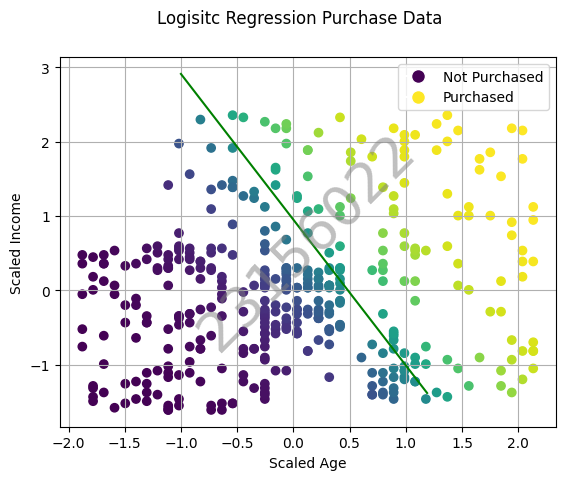

In [8]:
# Plot the probability of purchase at 0.5 probability
col = sigmoid(np.dot(X,np.transpose(logiReg.coef_))+logiReg.intercept_)
cf = logiReg.coef_
x1 = np.arange(-1.0,1.2,0.01)
x2 = -(cf[0,0]*x1 + logiReg.intercept_)/cf[0,1]
plt.figure(2)
plt.scatter(X[:, 0], X[:, 1], c=col)
plt.plot(x1,x2,'g')
plt.suptitle('Logisitc Regression Purchase Data')
plt.xlabel('Scaled Age')
plt.ylabel('Scaled Income')
plt.grid(True, which='both')
plt.axis('tight')
plt.legend(handles=handles)
plt.text(0.5, 0.5, '23156022', fontsize=40, color='gray', alpha=0.5,
         ha='center', va='center', transform=plt.gca().transAxes, rotation=45)
plt.show()  



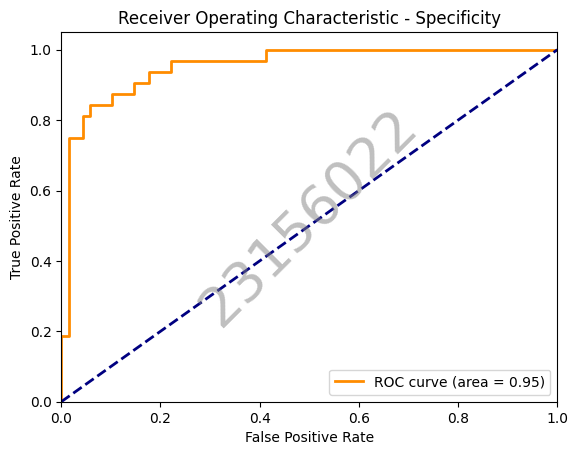

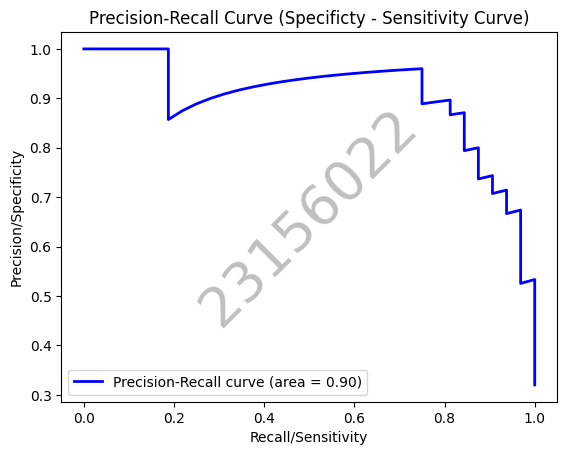

In [9]:
# Model RoC and Precision-Recall curves
X = purchaseData.iloc[:, [2, 3]].values
Y = purchaseData.iloc[:, 4].values

# Scale the data   
scaler = StandardScaler() 
X = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=0)

# Train the logistic regression model
model = LogisticRegression()
model.fit(X_train, Y_train)

# Predict probabilities
Y_probs = model.predict_proba(X_test)[:, 1]

# Compute ROC curve and ROC area
fpr, tpr, _ = roc_curve(Y_test, Y_probs)
roc_auc = auc(fpr, tpr)

# Compute Precision-Recall curve
precision, recall, _ = precision_recall_curve(Y_test, Y_probs)
pr_auc = auc(recall, precision)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - Specificity')
plt.legend(loc="lower right")
plt.text(0.5, 0.5, '23156022', fontsize=40, color='gray', alpha=0.5,
         ha='center', va='center', transform=plt.gca().transAxes, rotation=45)
plt.show()

# Plot Precision-Recall curve
plt.figure()
plt.plot(recall, precision, color='blue', lw=2, label='Precision-Recall curve (area = %0.2f)' % pr_auc)
plt.xlabel('Recall/Sensitivity')
plt.ylabel('Precision/Specificity')
plt.title('Precision-Recall Curve (Specificty - Sensitivity Curve)')
plt.legend(loc="lower left")
plt.text(0.5, 0.5, '23156022', fontsize=40, color='gray', alpha=0.5,
         ha='center', va='center', transform=plt.gca().transAxes, rotation=45)
plt.show()
